In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Define the path to the image folder in Google Drive
image_folder_path = "/content/drive/MyDrive/Dataset_truck"  # Update this path accordingly

# Function to recursively print the contents of a directory
def print_directory_contents(folder_path):
    for root, dirs, files in os.walk(folder_path):
        print(f"Directory: {root}")
        print("Files:")
        for file in files:
            print(f"\t{file}")

# Print the contents of the image folder
print_directory_contents(image_folder_path)


Directory: /content/drive/MyDrive/Dataset_truck
Files:
Directory: /content/drive/MyDrive/Dataset_truck/test_data
Files:
Directory: /content/drive/MyDrive/Dataset_truck/test_data/truck
Files:
	00000194.JPG
	00000176.jpg
	00000175.jpg
	00000191.jpg
	00000180.jpg
	00000196.jpg
	00000189.jpg
	00000180 (2).jpg
	00000192.jpg
	00000181.jpg
	00000183.jpg
	00000200.jpg
	00000188.jpg
	00000198.jpg
	00000190.jpg
	00000195.jpg
	00000187.jpg
	00000197.jpg
	00000193.jpg
	00000186.jpg
	00000178.jpg
	00000182.jpg
	00000179.png
	00000185.jpg
	00000202.jpg
	00000184.jpg
	00000201.jpg
	00000203.jpg
	00000184 (2).jpg
	00000231.jpg
	00000233.jpg
	00000217 (2).jpg
	00000227.jpg
	00000215.jpg
	00000219.jpg
	00000223.jpg
	00000212.jpg
	00000210.JPG
	00000221.png
	00000221.jpg
	00000216.jpg
	00000224.jpg
	00000222.jpg
	00000228.jpg
	00000230.jpg
	00000218.jpg
	00000214.jpg
	00000208.jpg
	00000205.jpg
	00000235.jpg
	00000218 (2).jpg
	00000212 (2).jpg
	00000229.jpg
	00000236.jpg
	00000225.jpg
	00000232.jpg
	0000

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the path to the image folder in Google Drive
image_folder_path = "/content/drive/MyDrive/Dataset_truck/test_data"  # Update this path accordingly

# Get a list of all files in the directory
all_files = os.listdir(image_folder_path)

# Filter only the image files
image_files = [file for file in all_files if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Load images and convert them to arrays
images = []
for image_file in image_files:
    image_path = os.path.join(image_folder_path, image_file)
    try:
        img = load_img(image_path, target_size=(150, 150))  # Adjust target_size as needed
        img_array = img_to_array(img) / 255.0  # Rescale pixel values to [0, 1]
        images.append(img_array)
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")

# Convert the list of images to a NumPy array
images = np.array(images)

# Print the number of loaded images
print(f"Number of images loaded: {len(images)}")

# Example: Accessing one image from the array
if len(images) > 0:
    example_image = images[0]
    print(f"Shape of the example image: {example_image.shape}")


Number of images loaded: 0


In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
from tensorflow import keras
import cv2

In [ ]:
from imutils import paths
from pathlib import Path

In [ ]:
images_path = Path(r"/content/drive/MyDrive/Dataset_truck")
trucks_data = list(paths.list_images(images_path))

In [ ]:
trucks_data[0:6]

['/content/drive/MyDrive/Dataset_truck/test_data/truck/00000194.JPG',
 '/content/drive/MyDrive/Dataset_truck/test_data/truck/00000176.jpg',
 '/content/drive/MyDrive/Dataset_truck/test_data/truck/00000175.jpg',
 '/content/drive/MyDrive/Dataset_truck/test_data/truck/00000191.jpg',
 '/content/drive/MyDrive/Dataset_truck/test_data/truck/00000180.jpg',
 '/content/drive/MyDrive/Dataset_truck/test_data/truck/00000196.jpg']

In [ ]:
truck_image_data = pd.Series(trucks_data, name="JPG").astype(str)

In [ ]:
truck_image_data.head()

0    /content/drive/MyDrive/Dataset_truck/test_data...
1    /content/drive/MyDrive/Dataset_truck/test_data...
2    /content/drive/MyDrive/Dataset_truck/test_data...
3    /content/drive/MyDrive/Dataset_truck/test_data...
4    /content/drive/MyDrive/Dataset_truck/test_data...
Name: JPG, dtype: object

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the image in grayscale
image_path = "/content/drive/MyDrive/Dataset_truck/test_data/00000176.jpg"
truck_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if truck_image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    # Display the image shape and dtype for verification
    print(f"Image shape: {truck_image.shape}, dtype: {truck_image.dtype}")

    # Convert image to float32 if needed
    if truck_image.dtype == 'object':
        truck_image = truck_image.astype('float32')

    # Display the image using matplotlib
    plt.imshow(truck_image, cmap='gray')
    plt.axis('off')  # Hide axis
    plt.show()

Error: Could not load image from /content/drive/MyDrive/Dataset_truck/test_data/00000176.jpg


In [ ]:
from skimage.morphology import skeletonize

In [ ]:
def simple_vision(img_path):
    Picking_Img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
    return Picking_Img

def skeleton_morph_vision(img_path):
    Picking_Img = simple_vision(img_path)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,Threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)

    Array_Img = np.array(Gray_Img > Threshold_Img).astype(int)
    Skeleton_Img = skeletonize(Array_Img)

    return Skeleton_Img

def threshold_vision(img_path):
    Picking_Img = simple_vision(img_path)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)

    return threshold_Img

def canny_vision(img_path):
    Threshold_Img = threshold_vision(img_path)
    Canny_Img = cv2.Canny(Threshold_Img,10,100)

    return Canny_Img

In [ ]:
import random
number = random.randint(0, 466)
global truck_label
truck_label = "Indian Truck"

Text(0.5, 1.0, 'Indian Truck')

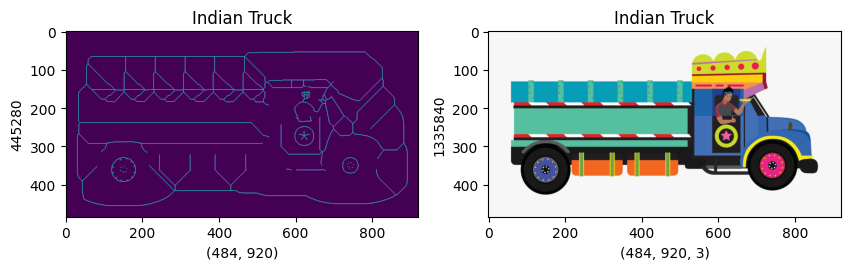

In [ ]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(10,10))

Skel_Img = skeleton_morph_vision(truck_image_data[number])
Simple_Img = simple_vision(truck_image_data[number])

axis[0].imshow(Skel_Img)
axis[0].set_xlabel(Skel_Img.shape)
axis[0].set_ylabel(Skel_Img.size)
axis[0].set_title(truck_label)
axis[1].imshow(Simple_Img)
axis[1].set_xlabel(Simple_Img.shape)
axis[1].set_ylabel(Simple_Img.size)
axis[1].set_title(truck_label)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, array_to_img

array([[[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       ...,

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]]], dtype=uint8)
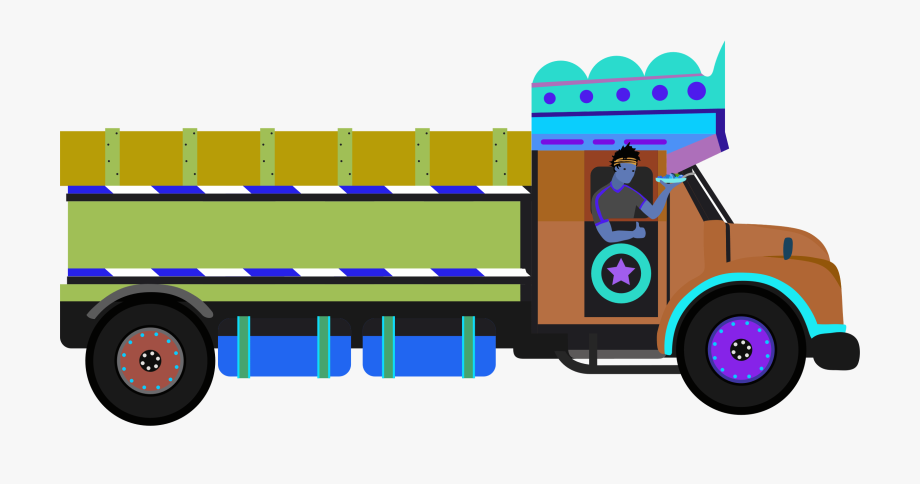

In [ ]:
cv2.imread(truck_image_data[number])

In [ ]:
sample_image = cv2.imread(truck_image_data[number])
sample_image.shape

(484, 920, 3)

In [ ]:
trainImageData = ImageDataGenerator(rescale = 1/255)
validImageData = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_dataset = trainImageData.flow_from_directory(
    '/content/drive/MyDrive/Dataset_truck/train_data',
    target_size = (200, 200),
    batch_size = 3,
    class_mode = 'binary'
)

Found 150 images belonging to 1 classes.


In [ ]:
validation_dataset = validImageData.flow_from_directory(
    '/content/drive/MyDrive/Dataset_truck/validation_data',
    target_size = (200, 200),
    batch_size = 3,
    class_mode = 'binary'
)

Found 101 images belonging to 1 classes.


In [ ]:
train_dataset.class_indices

{'truck': 0}

In [ ]:
from keras import layers
from keras.layers import Flatten, Dense, MaxPooling2D, Conv2D
from keras.models import Sequential

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

truck_model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])

In [ ]:
truck_model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
truck_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 198, 198, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 99, 99, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 97, 97, 32)        1

In [ ]:
truck_model.fit(
    train_dataset,
    steps_per_epoch = len(train_dataset),
    epochs = 3,
    validation_data = validation_dataset
)

Epoch 1/3
50/50 [==============================] - 71s 1s/step - loss: 0.6999 - accuracy: 0.6467 - val_loss: 0.0898 - val_accuracy: 1.0000
Epoch 2/3
50/50 [==============================] - 44s 878ms/step - loss: 0.3576 - accuracy: 0.8667 - val_loss: 5.9229e-08 - val_accuracy: 1.0000
Epoch 3/3
50/50 [==============================] - 45s 889ms/step - loss: 0.1411 - accuracy: 0.9600 - val_loss: 0.0068 - val_accuracy: 1.0000


In [ ]:
testingImageData = ImageDataGenerator(rescale = 1/255)
testing_dataset = validImageData.flow_from_directory(
    '/content/drive/MyDrive/Dataset_truck/test_data',
    target_size = (200, 200),
    batch_size = 3,
    class_mode = 'binary'
)

Found 215 images belonging to 1 classes.


In [ ]:
loss, accuracy = truck_model.evaluate(testing_dataset)

72/72 [==============================] - 10s 102ms/step - loss: 0.0409 - accuracy: 0.9860


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the path to a single image (example)
image_path = '/content/drive/MyDrive/Dataset_truck/train_data/truck/00000000 (2).jpg'  # Update with your image path

# Load and preprocess the image
img = load_img(image_path, target_size=(200, 200))  # Ensure the image is resized to (200, 200)
img_array = img_to_array(img) / 255.0  # Rescale pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Ensure the model is already defined and loaded as 'truck_model'
# Example: truck_model = tf.keras.models.load_model('path_to_model')

# Make prediction
prediction = truck_model.predict(img_array)
if prediction[0] < 0.5:  # Adjust threshold based on your model's output
    print("Truck")
else:
    print("Not a Truck")


1/1 [==============================] - 0s 396ms/step
Truck


In [ ]:
from keras.utils import load_img

In [ ]:
import numpy as np
import os
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

test_path = "/content/drive/MyDrive/Dataset_truck/test_data"
count = 0

for i in os.listdir(test_path):
    file_path = os.path.join(test_path, i)

    if os.path.isfile(file_path):
        img = load_img(file_path)
        plt.imshow(img)
        plt.show()

        X = img_to_array(img)
        x_imag = np.expand_dims(X, axis=0)
        images = np.vstack([x_imag])

        prediction = truck_model.predict(images)
        if prediction == 0:
            print("Truck")
        else:
            print("No truck")

        count += 1
        if count == 5:
            break

In [ ]:
from keras import models

In [ ]:
truck_model_ann = models.Sequential([
    layers.Flatten(input_shape=(200, 200, 3)),

    layers.Dense(3000, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(1000, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')
])

In [ ]:
truck_model_ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 120000)            0         
                                                                 
 dense_8 (Dense)             (None, 3000)              360003000 
                                                                 
 batch_normalization_6 (Bat  (None, 3000)              12000     
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 3000)              0         
                                                                 
 dense_9 (Dense)             (None, 1000)              3001000   
                                                                 
 batch_normalization_7 (Bat  (None, 1000)              4000      
 chNormalization)                                     

In [ ]:
truck_model_ann.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = truck_model_ann.fit(train_dataset, validation_data = validation_dataset, epochs = 2)

Epoch 1/2
50/50 [==============================] - 129s 3s/step - loss: 0.9580 - accuracy: 0.5733 - val_loss: 0.3147 - val_accuracy: 0.8911
Epoch 2/2
50/50 [==============================] - 124s 2s/step - loss: 0.6753 - accuracy: 0.6867 - val_loss: 0.3783 - val_accuracy: 0.8713


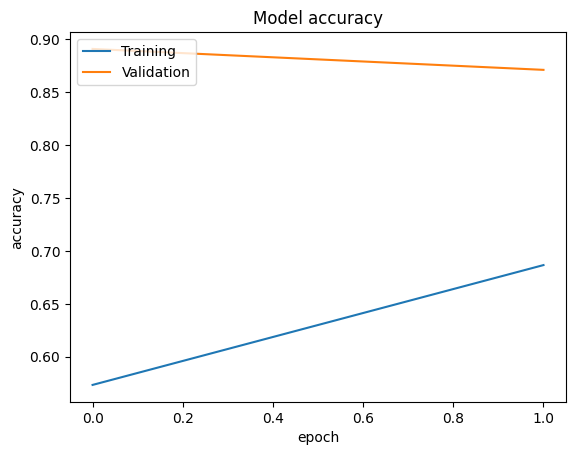

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Model accuracy")
plt.legend(['Training', "Validation"], loc = 'upper left')
plt.show()

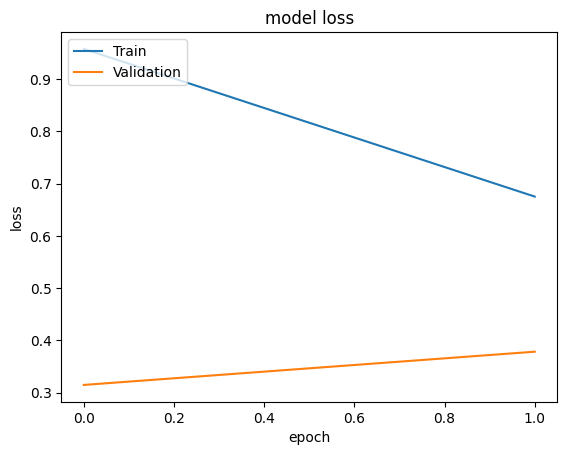

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()